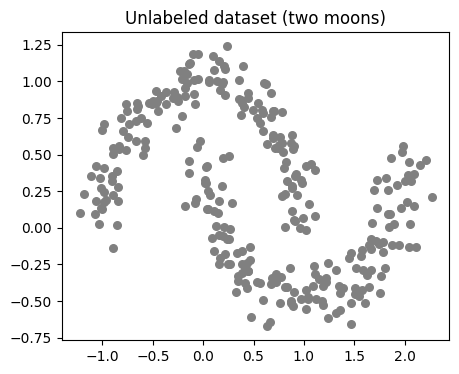

In [1]:
import numpy as np
from scipy.linalg import eigh
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate the two-moons dataset
n_samples = 300
X, y_true = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# Plot the unlabeled dataset before clustering
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], color='gray', s=30)
plt.title("Unlabeled dataset (two moons)")
plt.show()



In [2]:
# Kmeans clustering
k = 2
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(X)



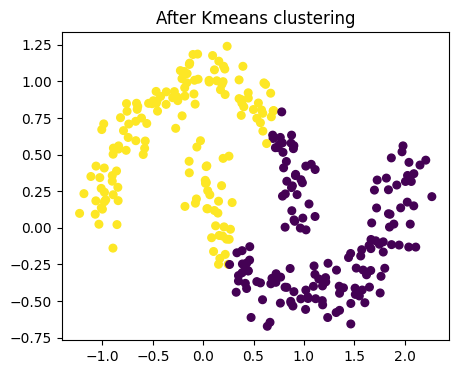

In [3]:
# Plot clustering result
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("After Kmeans clustering")
plt.show()

Spectral Clustering: Gaussian similarity $s(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$

[[1.00000000e+000 9.19875707e-042 2.61801250e-029 ... 4.71955223e-071
  3.02627520e-023 2.06332423e-060]
 [9.19875707e-042 1.00000000e+000 1.88714309e-111 ... 2.63451199e-180
  7.77941023e-004 3.96868453e-158]
 [2.61801250e-029 1.88714309e-111 1.00000000e+000 ... 4.69415718e-010
  9.63311417e-078 1.95338349e-006]
 ...
 [4.71955223e-071 2.63451199e-180 4.69415718e-010 ... 1.00000000e+000
  3.29268302e-137 1.47216660e-001]
 [3.02627520e-023 7.77941023e-004 9.63311417e-078 ... 3.29268302e-137
  1.00000000e+000 3.21557845e-118]
 [2.06332423e-060 3.96868453e-158 1.95338349e-006 ... 1.47216660e-001
  3.21557845e-118 1.00000000e+000]]


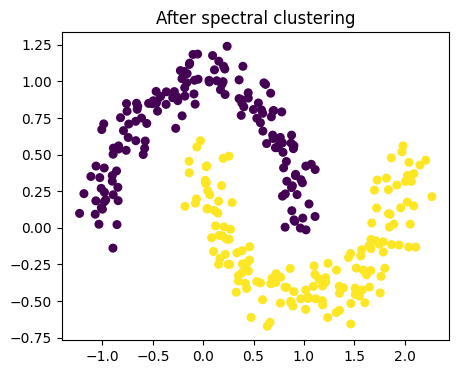

In [7]:
# Build similarity graph using Gaussian (RBF) kernel
sigma = 0.1  # width of the Gaussian
sq_dists = np.sum((X[:, None, :] - X[None, :, :])**2, axis=2)
W = np.exp(-sq_dists / (2 * sigma**2))
print(W)
np.fill_diagonal(W, 0)  # no self-loops

# Degree matrix and Laplacian
D = np.diag(W.sum(axis=1))
L = D - W

# Eigen decomposition of Laplacian
k = 2  # we expect 2 clusters
eigvals, eigvecs = eigh(L)
U = eigvecs[:, :k]  # first k eigenvectors

# k-means on the rows of U
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(U)

# Plot clustering result
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("After spectral clustering")
plt.show()


Epsilon-neighborhood similarity

$
W_{ij} =
\begin{cases}
1 & \text{if } \; \text{dist}(x_i, x_j) < \varepsilon, \\[6pt]
0 & \text{otherwise.}
\end{cases}
$


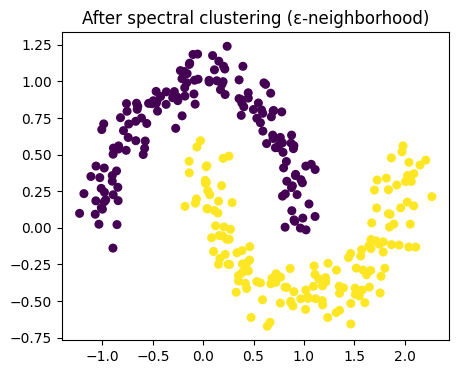

In [8]:

# Build similarity graph using ε-neighborhood
epsilon = 0.3 # neighborhood radius
# Euclidean distance
sq_dists = np.sum((X[:, None, :] - X[None, :, :])**2, axis=2)
dists = np.sqrt(sq_dists)

# Weighted Adjacency matrix
W = (dists < epsilon).astype(float)
np.fill_diagonal(W, 0)

# Degree matrix and Laplacian
D = np.diag(W.sum(axis=1))
L = D - W

# Eigen decomposition of Laplacian
k = 2
eigvals, eigvecs = eigh(L)
U = eigvecs[:, :k]  # first k eigenvectors

# k-means on the rows of U
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(U)

# 7. Plot clustering result
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.title("After spectral clustering (ε-neighborhood)")
plt.show()


